In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Read the CSV file

df = pd.read_csv('data/Sea_Level_Data/sealevel.csv')
df.describe()
# # Drop rows with any missing values
# df_cleaned = df.dropna()

# # Group by year and calculate the mean for each column
# df_averaged = df_cleaned.groupby('year').mean().reset_index()

# # Save only the Year and GMSL_GIA columns to a new CSV file
# df_averaged[['year', 'GMSL_GIA']].to_csv('data/averaged_sealevel_data.csv', index=False)

# # Read the averaged data
# df_avg_read = pd.read_csv('data/averaged_sealevel_data.csv')

,year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2006.742366,326568.269981,4.645515,87.007700,4.702004,8.112557,87.062805,8.168273,8.213044
std,8.231978,28044.226934,26.351001,5.525201,26.171990,28.310139,5.557840,28.138879,27.976127
min,1993.000000,906.100000,-44.390000,77.410000,-39.780000,-43.140000,77.420000,-39.770000,-39.110000
25%,2000.000000,327418.897500,-18.250000,83.510000,-17.882500,-16.615000,83.617500,-16.087500,-17.440000
50%,2007.000000,331979.205000,1.930000,85.925000,1.505000,5.465000,85.935000,5.065000,5.170000
75%,2014.000000,335243.865000,25.857500,88.602500,26.115000,30.942500,88.732500,31.095000,29.697500
max,2021.000000,341335.090000,57.920000,118.720000,56.310000,64.390000,118.760000,63.070000,60.560000


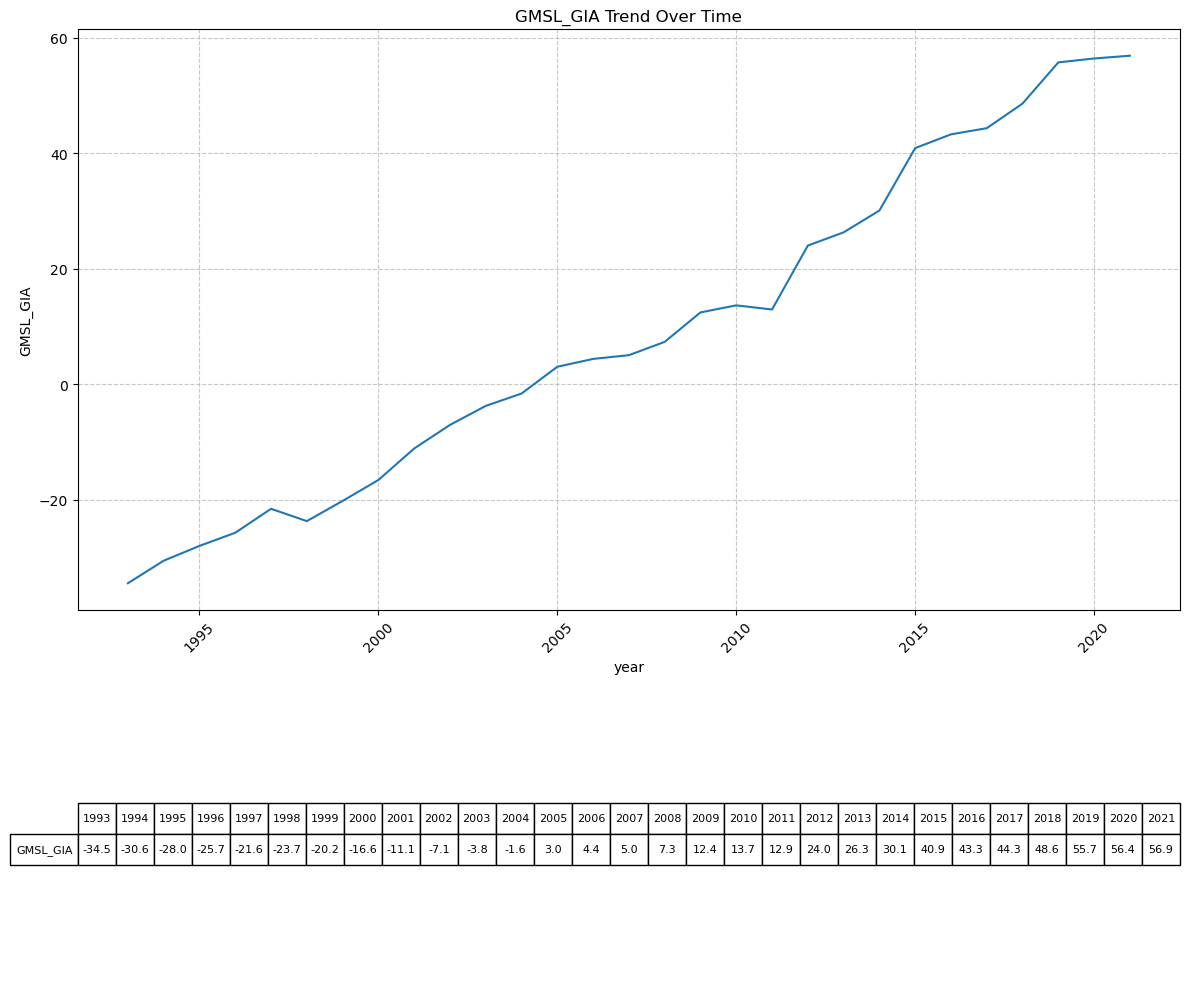

Data processing and visualization complete. Check 'averaged_sealevel_data.csv' and 'gmsl_gia_trend_with_table.png' for results.


In [4]:

# Create a figure with two subplots (one for the line plot, one for the table)
fig, (ax_plot, ax_table) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]})

# Create a line graph using seaborn on the first subplot
sns.lineplot(x='year', y='GMSL_GIA', data=df_avg_read, ax=ax_plot)

# Customize the plot
ax_plot.set_title('GMSL_GIA Trend Over Time')
ax_plot.set_xlabel('year')
ax_plot.set_ylabel('GMSL_GIA')

# Rotate x-axis labels for better readability
ax_plot.tick_params(axis='x', rotation=45)

# Add grid lines
ax_plot.grid(True, linestyle='--', alpha=0.7)

# Create a table on the second subplot
table_data = df_avg_read.set_index('year').T

# Format GMSL_GIA data to one decimal place
formatted_data = [[f"{value:.1f}" for value in table_data.values[0]]]

table = ax_table.table(cellText=formatted_data,
                       rowLabels=['GMSL_GIA'],
                       colLabels=table_data.columns,
                       cellLoc='center',
                       loc='center')

# Customize the table
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)  # Adjust the scale to fit your needs

# Hide axis for the table subplot
ax_table.axis('off')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('data/gmsl_gia_trend_with_table.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, comment out if running in a non-interactive environment)
plt.show()

# Print a message to confirm the script has finished running
print("Data processing and visualization complete. Check 'averaged_sealevel_data.csv' and 'gmsl_gia_trend_with_table.png' for results.")

In [7]:
# Step 1: Process temperature data
# Read the CSV file
df_temp = pd.read_csv("data/Temperature_data/temperatures_raw.csv")

# Remove rows from 1900 to 1992
df_temp = df_temp[(df_temp['year'] < 1900) | (df_temp['year'] > 1992)]

# Convert the 'Average_Fahrenheit_Temperature' column to numeric, forcing errors to NaN
df_temp['Average_Fahrenheit_Temperature'] = pd.to_numeric(df_temp['Average_Fahrenheit_Temperature'], errors='coerce')

# Convert Fahrenheit to Celsius, round to 2 decimal places, and rename the column in one step
df_temp['AverageTemp_Celcius'] = np.round((df_temp['Average_Fahrenheit_Temperature'] - 32) * 5/9, 2)
df_temp = df_temp.drop(columns=['Average_Fahrenheit_Temperature'])

# Save the processed temperature data
df_temp.to_csv("data/avg_temps.csv", index=False)

print("Temperature data processing completed. File saved as 'data/avg_temps.csv'")

# Step 2: Merge temperature data with sea level data
# Read the processed temperature data
df_temp = pd.read_csv("data/avg_temps.csv")

# Read the sea level data
df_sealevel = pd.read_csv("data/averaged_sealevel_data.csv")

# Merge the two dataframes based on the 'year' column
df_merged = pd.merge(df_sealevel, df_temp[['year', 'AverageTemp_Celcius']], on='year', how='left')

# Save the merged data to a new CSV file
df_merged.to_csv("data/temp_sealevel.csv", index=False)

print("Data merging completed. Combined file saved as 'data/temp_sealevel.csv'")

Temperature data processing completed. File saved as 'data/avg_temps.csv'
Data merging completed. Combined file saved as 'data/temp_sealevel.csv'


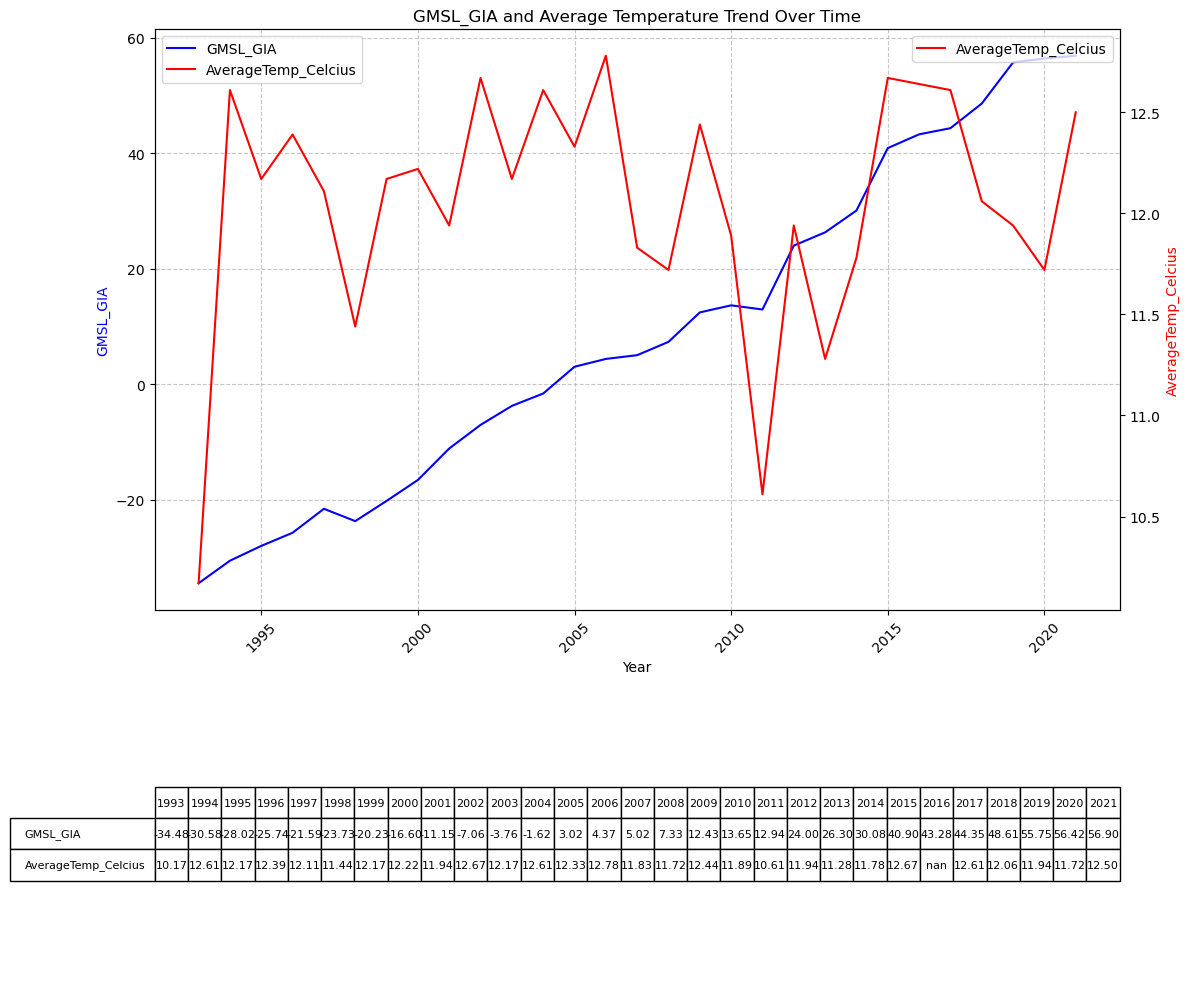

Data visualization complete. Check 'temp_sealevel_trend_with_table.png' for results.


In [8]:
# Read the combined temperature and sea level data
df = pd.read_csv('data/temp_sealevel.csv')

# Create a figure with two subplots (one for the line plot, one for the table)
fig, (ax_plot, ax_table) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]})

# Create a line graph using seaborn on the first subplot
sns.lineplot(x='year', y='GMSL_GIA', data=df, ax=ax_plot, color='blue', label='GMSL_GIA')
ax_plot.set_ylabel('GMSL_GIA', color='blue')

# Create a second y-axis for temperature
ax_temp = ax_plot.twinx()
sns.lineplot(x='year', y='AverageTemp_Celcius', data=df, ax=ax_temp, color='red', label='AverageTemp_Celcius')
ax_temp.set_ylabel('AverageTemp_Celcius', color='red')

# Customize the plot
ax_plot.set_title('GMSL_GIA and Average Temperature Trend Over Time')
ax_plot.set_xlabel('Year')

# Rotate x-axis labels for better readability
ax_plot.tick_params(axis='x', rotation=45)

# Add grid lines
ax_plot.grid(True, linestyle='--', alpha=0.7)

# Combine legends
lines1, labels1 = ax_plot.get_legend_handles_labels()
lines2, labels2 = ax_temp.get_legend_handles_labels()
ax_plot.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Create a table on the second subplot
table_data = df.set_index('year')[['GMSL_GIA', 'AverageTemp_Celcius']].T

# Format data to two decimal places, keeping negative signs
formatted_data = [[f"{value:.2f}" for value in row] for row in table_data.values]

table = ax_table.table(cellText=formatted_data,
                       rowLabels=['GMSL_GIA', 'AverageTemp_Celcius'],
                       colLabels=table_data.columns,
                       cellLoc='center',
                       loc='center')

# Customize the table
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)  # Adjust the scale to fit your needs

# Hide axis for the table subplot
ax_table.axis('off')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('data/temp_sealevel_trend_with_table.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, comment out if running in a non-interactive environment)
plt.show()

# Print a message to confirm the script has finished running
print("Data visualization complete. Check 'temp_sealevel_trend_with_table.png' for results.")